## Método de bisección

El *método de bisección* es un método elemental para determinar las raíces de una ecuación $f(x) = 0$, donde se requiere que $f: [a, b] \subset \mathbb R \rightarrow \mathbb R$ sea una función continua.b

Dados $a$ y $b$ tales que $f(a) f(b) < 0$, el teorema de Bolzano garantiza que existe al menos una raíz de la función en $[a,b]$. De esta forma, el método de bisección consiste en dividir el intervalo $[a,b]$ en dos partes iguales: $[a, c]$ y $[c, b]$, siendo $c$ el punto medio del intervalo. Al calcular $f(c)$ se observa lo siguiente:

* o bien $f(a) f(c) < 0$ en cuyo caso $f$ tiene al menos una raíz en $[a, c]$,
* o bien $f(c) f(b) < 0$ en cuyo caso $f$ tiene al menos una raíz en $[c, b]$,
* o bien $f(c) = 0$ y por lo tanto $c$ es una raíz de $f$.

En el tercer caso (muy poco frecuente en aritmética finita) el proceso de búsqueda habrá terminado al haberse encontrado una raíz. En los dos primeros casos, el proceso puede repetirse tomando ahora como nuevo intervalo el subintervalo $[a,c]$ (en el primer caso) o el subintervalo $[c,b]$ (en el segundo). Así (descartando el improbable tercer caso), el intervalo se dividirá repetidamente, reteniendo para la siguiente etapa el subintervalo que conserve el cambio de signo. De esta forma, se tiene un proceso iterativo que construye una sucesión de intervalos encajados

$$ (a_0, b_0) \supset (a_1, b_1) \supset \ldots \supset (a_k, b_k) \supset \ldots $$

donde cada intervalo contiene una raíz y la longitud de cada intervalo es la mitad del anterior. El proceso termina una vez la amplitud del intervalo es lo suficientemente pequeña como para satisfacer una cierta precisión dada, $\varepsilon_x$. 

A la hora de implementar el método, es conveniente realizar un test inicial para verificar el cambio de signo de la función dentro del intervalo, asegurando por tanto que este contiene una raíz de la función. Por otro lado, suele añadirse un segundo test de convergencia sobre el residuo de la función, en cuyo caso se detendrá el proceso iterativo siempre que el residuo sea lo suficientemente pequeño, es decir, $|f(c)| < \varepsilon_f$, con $\varepsilon_f$ una tolerancia dada.

A continuación se muestra un ejemplo de implementación del algoritmo en Python 3.8.10 (al que deberán añadirse comentarios explicando los argumentos de entrada de la función). Obsérvese que en el código se compara el signo de $f(a)$ y $f(b)$, en lugar de tomar el signo de $f(a) f(b)$, puesto que el primero únicamente necesita comparar dos bits.

In [17]:
import numpy as np

def biseccion(f, a, b, tol, nitmax):

    # Comprobamos si existe una raiz en el intervalo [a,b]
    if np.sign(f(a)) == np.sign(f(b)):
        print('f(a) y f(b) deben tener signo distinto. No se aplica el metodo.')
        return

    for nit in range(nitmax):
        # Calculamos punto medio del intervalo
        c = (a+b)/2.0

        # Comprobamos cual de los dos subintervalos conserva el cambio de 
        # signo entre sus extremos
        if np.sign(f(a)) != np.sign(f(c)):
            b = c
        else:
            a = c

        # Calculamos el residuo de la ecuacion
        res = abs(f(c))

        print('Iteracion %d, x* = %0.9f y f(x*) = %0.9e' % (nit+1, c, res))

        # Criterio de convergencia
        if res < tol:
            break

    return c, res, nit

<ul>
    <li>
        <i>Ejemplo 1</i>:
    </li>
</ul>

Se propone utilizar el método de bisección para calcular una raíz de la función $f(x) = x^3+x^2-9x+7$ en el intervalo $[0, 1.5]$.

El siguiente código utiliza la función ``biseccion`` definida previamente para calcular la raíz de la función en el intervalo dado. Además, se representa gráficamente la función en el mismo para verificar que la raíz está bien calculada.

Iteracion 1, x* = 0.750000000 y f(x*) = 1.234375000e+00
Iteracion 2, x* = 1.125000000 y f(x*) = 4.355468750e-01
Iteracion 3, x* = 0.937500000 y f(x*) = 2.653808594e-01
Iteracion 4, x* = 1.031250000 y f(x*) = 1.210632324e-01
Iteracion 5, x* = 0.984375000 y f(x*) = 6.347274780e-02
Iteracion 6, x* = 1.007812500 y f(x*) = 3.100538254e-02
Iteracion 7, x* = 0.996093750 y f(x*) = 1.568597555e-02
Iteracion 8, x* = 1.001953125 y f(x*) = 7.797233760e-03
Iteracion 9, x* = 0.999023438 y f(x*) = 3.910063766e-03
Iteracion 10, x* = 1.000488281 y f(x*) = 1.952171209e-03
Iteracion 11, x* = 0.999755859 y f(x*) = 9.768009040e-04
Iteracion 12, x* = 1.000122070 y f(x*) = 4.882216435e-04
Iteracion 13, x* = 0.999938965 y f(x*) = 2.441555259e-04
Iteracion 14, x* = 1.000030518 y f(x*) = 1.220665872e-04
Iteracion 15, x* = 0.999984741 y f(x*) = 6.103608757e-05
Iteracion 16, x* = 1.000007629 y f(x*) = 3.051734529e-05
Iteracion 17, x* = 0.999996185 y f(x*) = 1.525884727e-05
Iteracion 18, x* = 1.000001907 y f(x*) =

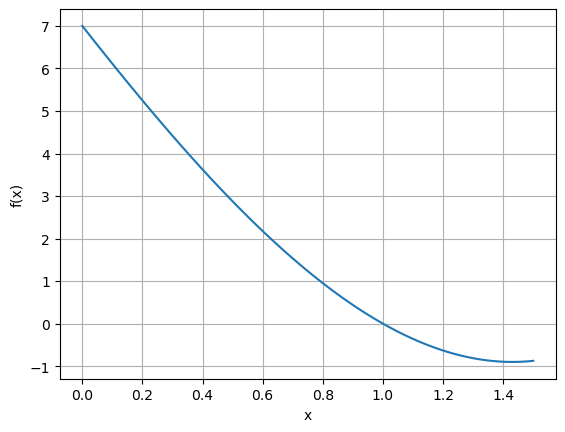

In [18]:
# Definimos la funcion
def f(x):
    return x**3+x**2-9*x+7

a      = 0    # Punto inicial del intervalo
b      = 1.5  # Punto final del intervalo
tol    = 1e-8 # Tolerancia criterio de parada
nitmax = 100  # Numero maximo de iteraciones

x, res, nit = biseccion(f, a, b, tol, nitmax)

# Representación de la funcion
import matplotlib.pyplot as plt
import numpy             as np

# Definimos un vector de puntos donde evaluar la funcion
x_vec = np.linspace(a, b, 100)

# Representamos la funcion
plt.plot(x_vec, f(x_vec))
plt.ylabel('f(x)')
plt.xlabel('x')
plt.grid()

## Método de Newton-Raphson

Dada una función $f: [a, b] \subset \mathbb R \rightarrow \mathbb R$ cualquiera, tal y como se ha comentado, en general no se dispone de técnicas analíticas para resolver de forma exacta la ecuación

$$f(x) = 0.$$

Sin embargo, sí se dispone de técnicas para calcularla cuando $f$ es una función simple, por ejemplo un polinomio de orden uno o dos.

El método de Newton-Raphson propone sustituir la función $f$ por el polinomio de Taylor de orden uno en el entorno de una aproximación de la raíz $x_*$ para resolver la ecuación. Así, si se cuenta con una cierta aproximación de $x_*$, que denotamos $x_{n}$, el método de Newton-Raphson propone calcular una nueva aproximación $x_{n+1}$ resolviendo:

$$P_n(x_{n+1}) = 0,$$

donde

$$P_n(x) = f(x_n) + f'(x_n)(x-x_n).$$

De esta forma, el método genera una sucesión a partir de un iterante inicial $x_0$ y la siguiente fórmula de recurrencia

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

que se espera que converja a $x_*$.

A continuación se muestra un ejemplo de implementación del algoritmo en una función (para Python 3.8.10) donde, como en el ejemplo anterior, deberán comentarse adecuadamente los argumentos de entrada.

In [19]:
def newton(f, df, x0, tol_x, tol_f, nitmax):

    for nit in range(nitmax):

        # Calcular valor de x (si es posible)
        if df(x0) != 0.0:
            x = x0 - f(x0)/df(x0)
        else:
            print("No es posible iterar: f'(xn)=0")
            break

        # Calcular valor de la diferencia entre x y x0
        dif = abs(x-x0)
        # Calcular valor del residuo
        res = abs(f(x))

        print('Iteracion %d, x = %0.9f, |x-xn| = %0.6e y f(x) = %0.6e' % (nit+1, x, dif, res))

        # Criterios de convergencia
        if dif < tol_x:
            break
        else:
            x0 = x

        if res < tol_f:
            break

    return x, res, nit

<ul>
    <li>
        <i>Ejemplo 2</i>:
    </li>
</ul>

Se propone utilizar el método de Newton-Raphson para calcular la única raíz de  $f(x) = x^3+x^2-9x+7$ en el intervalo $[0, 1.5]$, tomando como iterante inicial el punto medio del intervalo $x_0 = 0.75$. Se sugiere emplear la representación de esta función (en una figura anterior) para generar gráficamente los iterantes del método de Newton-Raphson (obsérvese que se tratará de la intersección de la recta tangente al grafo de la función en el punto correspondiente al iterante con el eje de abscisas) y comprobar la rápida convergencia de la sucesión. 

El siguiente código utiliza la función ``newton`` definida previamente para calcular la raíz de la función en el intervalo dado. Obsérvese que el método de Newton-Raphson converge a la raíz con una tolerancia de $10^{-8}$ en 4 iteraciones, cuando el método de bisección requería 28 iteraciones para detenerse con esa misma tolerancia.

In [20]:
# Definimos la funcion
def f(x):
    return x**3+x**2-9*x+7

# Definimos la derivada de la funcion
def df(x):
    return 3*x**2+2*x-9

x0     = 0.75 # Iterante inicial
tol_x  = 1e-8 # Tolerancia
tol_f  = 1e-8 # Tolerancia
nitmax = 20   # Numero maximo de iteraciones

x, res, nit = newton(f, df, x0, tol_x, tol_f, nitmax)

Iteracion 1, x = 0.962365591, |x-xn| = 2.123656e-01 y f(x) = 1.561497e-01
Iteracion 2, x = 0.998706304, |x-xn| = 3.634071e-02 y f(x) = 5.181477e-03
Iteracion 3, x = 0.999998332, |x-xn| = 1.292028e-03 y f(x) = 6.673023e-06
Iteracion 4, x = 1.000000000, |x-xn| = 1.668250e-06 y f(x) = 1.113243e-11


## Método de la secante

Existen otros métodos numéricos para la resolución de ecuaciones no lineales que buscan propiedades de convergencia similares a las del método de Newton-Raphson pero evitando la evaluación de la derivada de la función $f$, tratando con aproximaciones numéricas de esta. Uno de estos métodos es el llamado método de la secante.

La idea de este método es muy simple y se basa en las técnicas de derivación numérica ya estudiadas. En particular, si el método ya ha calculado al menos un iterante, de modo que se dispone de dos aproximaciones $x_{n}$ y $x_{n-1}$, es posible aproximar el valor de $f'(x_n)$ utilizando el esquema descentrado

$$ f'(x_n) \simeq \frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}} $$

Así, dada $f: [a, b] \subset \mathbb R \rightarrow \mathbb R$ una función regular y $x_{0}$ y $x_{1}$ dos valores próximos a la raíz buscada, el *método de la secante* propone generar una sucesión a través de la fórmula de recurrencia (de tres términos)

$$x_{n+1} = x_n - f(x_n)\frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})} 
          = \frac{x_{n-1} f(x_n) - x_n f(x_{n-1})}{f(x_n) - f(x_{n-1})} .$$

Nótese que a medida que $x_n$ se acerca a $x_*$ la aproximación de la derivada mejora, aunque debe prestarse atención a la pérdida de precisión debido a la división por un valor pequeño.

Puesto que se trata de un método basado en el método de Newton-Raphson donde la derivada se sustituye por una aproximación, se espera que sus propiedades sean similares. En cierto modo, así es pero con algunos matices, como se va a ver.

Por un lado, se había observado que el método de Newton-Raphson podría tener dificultades al arrancar si el iterante inicial $x_0$ no estaba muy cerca de la solución. Aunque el método de la secante puede presentar dificultades similares a las de Newton-Raphson en cuanto a convergencia global, es posible hacer que se comporte de forma mucho más robusta y evite esas dificultades en la mayor parte de los casos. Así, por ejemplo, pueden tomarse $x_0$ y $x_1$ rodeando a la raíz $x_{*}$ que se busca (en vez de tomar dos valores muy próximos entre sí, como sugeriría la aproximación de la derivada con un error reducido). De hecho, se puede asegurar la convergencia si se eligen $x_0$ y $x_1$ tales que $f(x_0)f(x_1)<0$, tal como se hacía en el método de bisección. 

Puede retomarse de nuevo el ejemplo con el que se ha ilustrado la aplicación del método de bisección y el método de Newton-Raphson para aplicar ahora el método de la secante y observar las diferencias entre las tres técnicas. Téngase en cuenta que, para la programación de la función que implemente el método de la secante (a diferencia de la función que implementa el método de Newton-Raphson), es necesario contar con dos pasos anteriores y no con uno. 

Por otro lado, para comparar el método de la secante con el método de Newton-Raphson considérense dos situaciones distintas:
 
* un caso donde el método de Newton-Raphson converge rápidamente a la solución y donde, al arrancar el método de la secante con dos puntos próximos entre sí (y próximos al iterante inicial usado para el método de Newton-Raphson), se obtiene una convergencia similar pero ligeramente más lenta.  

* un caso (anteriormente se sugirió un ejemplo) donde el método de Newton-Raphson arranca de un punto alejado de la raíz y no converge (o lo hace tras muchas iteraciones) para, en este caso, observar que el método de la secante arrancando de los puntos relativamente alejados de la raíz pero encerrando a ésta, sí es capaz de converger.

In [21]:
def secante(f, x0, x1, tol_x, tol_f, nitmax):

    for nit in range(nitmax):

        x  = x0 - f(x0)*(x1-x0)/(f(x1)-f(x0))
        
        # Calcular valor de la diferencia entre x y x0
        dif = abs(x-x1)
        # Calcular valor del residuo
        res = abs(f(x))

        print('Iteracion %d, x = %0.9f, |x-xn| = %0.6e y f(x) = %0.6e' % (nit+1, x, dif, res))

        # Criterios de convergencia
        if dif < tol_x:
            break
        else:
            x0 = x1
            x1 = x
            
        if res < tol_f:
            break

    return x, res, nit

<ul>
    <li>
        <i>Ejemplo 3</i>:
    </li>
</ul>

Se propone utilizar el método de la secante para calcular la única raíz de  $f(x) = x^3+x^2-9x+7$ en el intervalo $[0, 1.5]$, tomando como iterante inicial los extremos del intervalo $x_0 = 0.0$ y $x_1 = 1.5$. Podemos ver como la convergencia de este método es más rápida que bisección pero más lenta que Newton.

In [22]:
# Definimos la funcion
def f(x):
    return x**3+x**2-9*x+7

x0     = 0.0  # Iterante inicial 1
x1     = 1.5  # Iterante inicial 2 
tol_x  = 1e-8 # Tolerancia
tol_f  = 1e-8 # Tolerancia
nitmax = 20   # Numero maximo de iteraciones

x, res, nit = secante(f, x0, x1, tol_x, tol_f, nitmax)

Iteracion 1, x = 1.333333333, |x-xn| = 1.666667e-01 y f(x) = 8.518519e-01
Iteracion 2, x = -4.800000000, |x-xn| = 6.133333e+00 y f(x) = 3.735200e+01
Iteracion 3, x = 1.476474981, |x-xn| = 6.276475e+00 y f(x) = 8.896129e-01
Iteracion 4, x = 1.629609041, |x-xn| = 1.531341e-01 y f(x) = 6.832242e-01
Iteracion 5, x = 2.136540304, |x-xn| = 5.069313e-01 y f(x) = 2.088830e+00
Iteracion 6, x = 1.754551639, |x-xn| = 3.819887e-01 y f(x) = 3.112113e-01
Iteracion 7, x = 1.804083766, |x-xn| = 4.953213e-02 y f(x) = 1.102513e-01
Iteracion 8, x = 1.831258253, |x-xn| = 2.717449e-02 y f(x) = 1.331950e-02
Iteracion 9, x = 1.828329160, |x-xn| = 2.929093e-03 y f(x) = 4.590307e-04
Iteracion 10, x = 1.828426742, |x-xn| = 9.758254e-05 y f(x) = 1.792677e-06
Iteracion 11, x = 1.828427125, |x-xn| = 3.825885e-07 y f(x) = 2.430678e-10


## EJERCICIOS

Sea $p(x) = x^3 - x - 1$. La única raíz real de $p(x)$ se llama el [número plástico](https://en.wikipedia.org/wiki/Plastic_number) y se da por

$$
\frac{\sqrt[3]{108 + 12\sqrt{69}} + \sqrt[3]{108 - 12\sqrt{69}}}{6}
$$

**Ejercicio 1.** Elija $x_0 = 1$ e implemente 2 iteraciones del método de Newton para aproximar el número plástico.

**Ejercicio 2.** Use el valor exacto anterior para calcular el error absoluto después de 2 iteraciones del método de Newton.

**Ejercicio 3.** Comenzando con el subintervalo $[1,2]$, ¿cuántas iteraciones del método de bisección se requieren para lograr la misma precisión?

**Ejercicio 4.** Misma pregunta pero usando el método de la secante y empezando con $x_0=1$ y $x_1=2$.

**Ejercicio 5.** Probad los tres métodos con la función $f(x)=signo(x)|x|^{1/3}$ en el intervalo $[-1,1]$ y buscar una explicación a los resultados obtenidos. 